Ejercicio 4

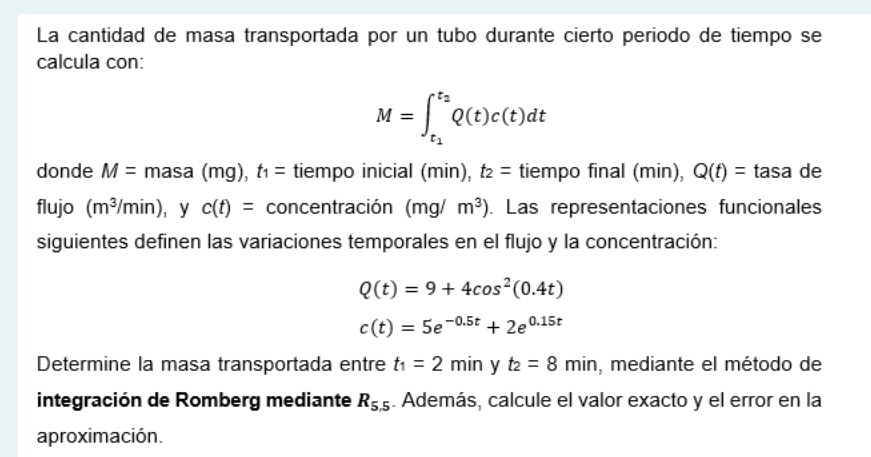

Integral planteada

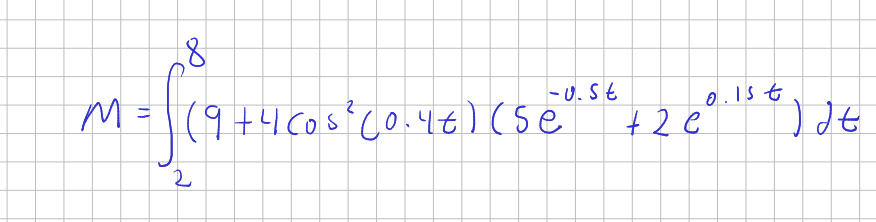

In [7]:
from sympy import *
from numpy import zeros, float64

x = symbols("x")

f = (9 + 4 * (cos(0.4*x))**2) * (5 * exp(-0.5 * x) + 2 * exp(0.15*x))

#
n = 5
a = 2
b = 8

# declaro mi matriz (n, n) es este caso de orden (5,5)
R = zeros((n, n), dtype=float64)

# Imprimo la matriz
print(R)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [8]:
# Utilizo la función que he desarrollado para la regla compuesta del trapecio

def regla_compuesta_del_trapecio(f, a, b, n):
    # Defino mi h dentro de la función
    h = (b-a) / n
    # La suma interna es el factor de la fórmula, la inicio con f(x_0)
    suma_interna = f.subs(x, a)
    # Aquí hago la sumatoria desde f(x_1) hasta f(x_(n-1)) 
    for i in range(1, n):
        suma_interna += 2 * f.subs(x, a + i*h)
    # Sumo f(x_n)
    suma_interna += f.subs(x, b)
    return (h/2) * suma_interna

# Y encuentro cada valor con mi función donde "n" de la regla compuesta
# Se duplica en cada iteración

R11 = float(regla_compuesta_del_trapecio(f, a, b, 1))
R21 = float(regla_compuesta_del_trapecio(f, a, b, 2))
R31 = float(regla_compuesta_del_trapecio(f, a, b, 4))
R41 = float(regla_compuesta_del_trapecio(f, a, b, 8))
R51 = float(regla_compuesta_del_trapecio(f, a, b, 16))

# Ahora estos valor les pongo el la primera columna de mi matriz R

R[0][0] = R11
R[1][0] = R21
R[2][0] = R31
R[3][0] = R41
R[4][0] = R51

# Saco mi valor exacto a modo de verificación

valor_exacto = float(integrate(f, (x, a, b)))


# El valor exacto y R51 no deben ser tan lejanos

print(valor_exacto)
print(R[4][0])

322.34836725424253
322.6294091750526


In [9]:
# Ahora lleno el resto de la matriz con la versión espejo de la
# Interpolación de Richarson

for j in range(1, n):
    for i in range(j, n):
        # La j es diferente a la fórmula por la forma de indexar de Python
        R[i][j] = (4**(j) * R[i][j-1] - R[i-1][j-1]) / (4**(j) - 1)

#imprimo de forma que se vea bien la matriz
for i in R:
    for j in i:
        print(str(j).ljust(18), end="  ")
    print("\n")

# el valor R[n-1][n-1] es el valor aproximado

411.26095166765333  0.0                 0.0                 0.0                 0.0                 

340.68170895690884  317.155294719994    0.0                 0.0                 0.0                 

326.86219464673604  322.25568987667845  322.5957162204574   0.0                 0.0                 

323.4733566504297   322.34374398499426  322.34961425888196  322.3457078785395   0.0                 

322.6294091750526   322.34809334992696  322.34838330758913  322.34836376867975  322.34837418393516  



In [10]:
# Imprimo lo que pide el ejercicio

valor_aproximado = R[n-1][n-1]
error = abs(valor_aproximado - valor_exacto)
error_relativo = round(float(error/valor_exacto * 100), 6)

print("El valor exacto es:", valor_exacto)
print("El valor aproximado es:", valor_aproximado)
print("El error es:", error)
print(f"El error relativo es: {error_relativo}%")

El valor exacto es: 322.34836725424253
El valor aproximado es: 322.34837418393516
El error es: 6.92969263127452e-06
El error relativo es: 2e-06%
